**Set environment**

In [14]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
suppressWarnings(suppressMessages(library("GenomicRanges")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data**

In [2]:
fdiry = file.path(FD_RES, "source", "CRISPRi_growth")
for (idx in dir(fdiry)) {print(idx)}

[1] "2023_resubmission"
[1] "k562-gw-v3-all.sorted.counts.results.hg38.txt.gz"
[1] "k562-gw-v3-all.sorted.counts.results.top_guide_fdr_0_05.hg38.bed.gz"


## Import data

**Import total guides & DHS**

In [3]:
fdiry = file.path(FD_RES, "source", "CRISPRi_growth")
fname = "k562-gw-v3-all.sorted.counts.results.hg38.txt.gz"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
colnames(dat)[1] = "RowID"

dat_peak_crispri_growth_total = dat
print(dim(dat))
head(dat)

New names:
• `` -> `...1`


[1] 1092166      22


RowID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,weight,name,dhs_chrom,⋯,ID,chrPerturbationTarget,startPerturbationTarget,endPerturbationTarget,chrom,start,end,dhs_id,score,strand
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
0,669.8027,-0.98593380,0.13527811,-7.5156478,5.662983e-14,3.245787e-11,1.0189024,chr1.1.1,chr1,⋯,chr1.1,chr1,540951,540970,chr1,605550,605627,chr1.1,521,.
1,1210.5948,0.01755679,0.11259581,0.9724725,3.308155e-01,8.618381e-01,1.3894218,chr1.1.2,chr1,⋯,chr1.1,chr1,540971,540990,chr1,605550,605627,chr1.1,521,.
2,2065.7482,0.01422210,0.07694619,0.7948325,4.267110e-01,9.074943e-01,1.2206106,chr1.1.3,chr1,⋯,chr1.1,chr1,540963,540982,chr1,605550,605627,chr1.1,521,.
3,670.0537,0.01843545,0.12623486,1.0421596,2.973377e-01,8.864450e-01,1.0189024,chr1.1.4,chr1,⋯,chr1.1,chr1,540953,540972,chr1,605550,605627,chr1.1,521,.
4,1023.9170,0.01126530,0.10178712,0.6436207,5.198214e-01,9.145863e-01,1.3894218,chr1.1.5,chr1,⋯,chr1.1,chr1,540954,540973,chr1,605550,605627,chr1.1,521,.
5,605.4137,0.03242606,0.14597771,1.6813118,9.270237e-02,7.390114e-01,0.9584715,chr1.1.6,chr1,⋯,chr1.1,chr1,540979,540998,chr1,605550,605627,chr1.1,521,.


**Import significant guides**

In [4]:
fdiry = file.path(FD_RES, "source", "CRISPRi_growth")
fname = "k562-gw-v3-all.sorted.counts.results.top_guide_fdr_0_05.hg38.bed.gz"
fpath = file.path(fdiry, fname)

dat = read_csv(fpath, show_col_types = FALSE)
colnames(dat)[1] = "RowID"

dat_peak_crispri_growth_fdr = dat
print(dim(dat))
head(dat)

New names:
• `` -> `...1`


[1] 6242    7


RowID,chrom,start,end,name,log2FoldChange,padj
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
504606,chr19,11155578,11156290,chr19.1899.3,-2.549922,3.771775e-123
686888,chr22,30356286,30357525,chr22.1285.6,-3.059909,9.819760e-120
868222,chr6,34530428,34530534,chr6.2172.8,-3.100194,1.232839e-117
50002,chr1,20685850,20686283,chr1.2930.10,-2.862158,9.548565e-109
811835,chr5,70924811,70925615,chr5.1649.1,-2.927110,4.298640e-107
811815,chr5,70049360,70050252,chr5.1647.1,-2.927110,4.298640e-107


## Understand the column

My understanding
```
dhs_chrom, dhs_start, dhs_end => hg19
chrom, start
```

In [5]:
dat = dat_peak_crispri_growth_total
colnames(dat)

[1] "RowID"                   "baseMean"               
 [3] "log2FoldChange"          "lfcSE"                  
 [5] "stat"                    "pvalue"                 
 [7] "padj"                    "weight"                 
 [9] "name"                    "dhs_chrom"              
[11] "dhs_start"               "dhs_end"                
[13] "ID"                      "chrPerturbationTarget"  
[15] "startPerturbationTarget" "endPerturbationTarget"  
[17] "chrom"                   "start"                  
[19] "end"                     "dhs_id"                 
[21] "score"                   "strand"

In [6]:
txt = c(
    "chrom",     "start",     "end", 
    'dhs_chrom', 'dhs_start', 'dhs_end', "dhs_id", 'ID',
    'chrPerturbationTarget',
    'startPerturbationTarget',
    'endPerturbationTarget')

dat = dat_peak_crispri_growth_total
print(dim(dat))

dat = dat %>% dplyr::select({{txt}}) %>% dplyr::distinct()
print(dim(dat))
head(dat)

[1] 1092166      22
[1] 1070790      11


chrom,start,end,dhs_chrom,dhs_start,dhs_end,dhs_id,ID,chrPerturbationTarget,startPerturbationTarget,endPerturbationTarget
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chr1,605550,605627,chr1,540930,541007,chr1.1,chr1.1,chr1,540951,540970
chr1,605550,605627,chr1,540930,541007,chr1.1,chr1.1,chr1,540971,540990
chr1,605550,605627,chr1,540930,541007,chr1.1,chr1.1,chr1,540963,540982
chr1,605550,605627,chr1,540930,541007,chr1.1,chr1.1,chr1,540953,540972
chr1,605550,605627,chr1,540930,541007,chr1.1,chr1.1,chr1,540954,540973
chr1,605550,605627,chr1,540930,541007,chr1.1,chr1.1,chr1,540979,540998


**Protospacer**

In [7]:
txt = c(
    'chrPerturbationTarget',
    'startPerturbationTarget',
    'endPerturbationTarget',
    'strand'
)

dat = dat_peak_crispri_growth_total
print(dim(dat))

dat = dat %>% dplyr::select({{txt}}) %>% dplyr::distinct()
print(dim(dat))
head(dat)

[1] 1092166      22
[1] 1070790       4


chrPerturbationTarget,startPerturbationTarget,endPerturbationTarget,strand
<chr>,<dbl>,<dbl>,<chr>
chr1,540951,540970,.
chr1,540971,540990,.
chr1,540963,540982,.
chr1,540953,540972,.
chr1,540954,540973,.
chr1,540979,540998,.


In [8]:
txt = c(
    'baseMean',
    'log2FoldChange',
    'score'
)

dat = dat_peak_crispri_growth_total
print(dim(dat))

dat = dat %>% dplyr::select({{txt}}) %>% dplyr::distinct()
print(dim(dat))
head(dat)

[1] 1092166      22
[1] 1090971       3


baseMean,log2FoldChange,score
<dbl>,<dbl>,<dbl>
669.8027,-0.98593380,521
1210.5948,0.01755679,521
2065.7482,0.01422210,521
670.0537,0.01843545,521
1023.9170,0.01126530,521
605.4137,0.03242606,521


## Number of DHS

In [18]:
txt = c('chrom','start','end')

dat = dat_peak_crispri_growth_total
print(dim(dat))

dat = dat %>% dplyr::select({{txt}}) %>% dplyr::distinct()
print(dim(dat))
head(dat)

[1] 1092166      22
[1] 111702      3


chrom,start,end
<chr>,<dbl>,<dbl>
chr1,605550,605627
chr1,865344,865447
chr1,1140728,1142081
chr1,4173215,4173505
chr1,176948943,176949446
chr1,176954362,176954533


In [19]:
txt = c('chrom','start','end')

dat = dat_peak_crispri_growth_fdr
print(dim(dat))

dat = dat %>% dplyr::select({{txt}}) %>% dplyr::distinct()
print(dim(dat))
head(dat)

[1] 6242    7
[1] 6242    3


chrom,start,end
<chr>,<dbl>,<dbl>
chr19,11155578,11156290
chr22,30356286,30357525
chr6,34530428,34530534
chr1,20685850,20686283
chr5,70924811,70925615
chr5,70049360,70050252


## Is overlapped/merged DHS

In [20]:
txt = c('chrom','start','end')

dat = dat_peak_crispri_growth_total
dat = dat %>% dplyr::select({{txt}}) %>% dplyr::distinct()
head(dat)

chrom,start,end
<chr>,<dbl>,<dbl>
chr1,605550,605627
chr1,865344,865447
chr1,1140728,1142081
chr1,4173215,4173505
chr1,176948943,176949446
chr1,176954362,176954533


In [23]:
grg = GRanges(
    seqnames = dat$chrom,
    ranges   = IRanges(start = dat$start, end = dat$end)
)
tmp = reduce(grg)

print(length(grg))
print(length(tmp))

[1] 111702
[1] 111634


## Check two tables

In [25]:
dat = dat_peak_crispri_growth_total
colnames(dat)

[1] "RowID"                   "baseMean"               
 [3] "log2FoldChange"          "lfcSE"                  
 [5] "stat"                    "pvalue"                 
 [7] "padj"                    "weight"                 
 [9] "name"                    "dhs_chrom"              
[11] "dhs_start"               "dhs_end"                
[13] "ID"                      "chrPerturbationTarget"  
[15] "startPerturbationTarget" "endPerturbationTarget"  
[17] "chrom"                   "start"                  
[19] "end"                     "dhs_id"                 
[21] "score"                   "strand"

In [35]:
txt = c('chrom', 'start', 'end')

dat = dat_peak_crispri_growth_total
print(dim(dat))

dat = dat %>% 
    dplyr::filter(padj <= 0.05) %>% 
    dplyr::select({{txt}}) %>% 
    dplyr::arrange(chrom, start, end)

dat0 = dat
print(dim(dat))
head(dat)

[1] 1092166      22
[1] 8200    3


chrom,start,end
<chr>,<dbl>,<dbl>
chr1,605550,605627
chr1,826642,827902
chr1,964946,965136
chr1,995761,996190
chr1,1067929,1070953
chr1,1155362,1155639


In [32]:
txt = c('chrom', 'start', 'end')

dat = dat_peak_crispri_growth_total
print(dim(dat))

dat = dat %>% 
    dplyr::filter(padj <= 0.05) %>% 
    dplyr::select({{txt}}) %>% 
    dplyr::arrange(chrom, start, end) %>%
    dplyr::distinct()

dat1 = dat
print(dim(dat))
head(dat)

[1] 1092166      22
[1] 6242    3


chrom,start,end
<chr>,<dbl>,<dbl>
chr1,605550,605627
chr1,826642,827902
chr1,964946,965136
chr1,995761,996190
chr1,1067929,1070953
chr1,1155362,1155639


In [33]:
txt = c('chrom', 'start', 'end')

dat = dat_peak_crispri_growth_fdr
print(dim(dat))

dat = dat %>% 
    dplyr::select({{txt}}) %>% 
    dplyr::arrange(chrom, start, end) %>%
    dplyr::distinct()

dat2 = dat
print(dim(dat))
head(dat)

[1] 6242    7
[1] 6242    3


chrom,start,end
<chr>,<dbl>,<dbl>
chr1,605550,605627
chr1,826642,827902
chr1,964946,965136
chr1,995761,996190
chr1,1067929,1070953
chr1,1155362,1155639


In [34]:
print(all(dat1$chrom == dat2$chrom))
print(all(dat1$start == dat2$start))
print(all(dat1$end   == dat2$end))

[1] TRUE
[1] TRUE
[1] TRUE


## Plot

In [25]:
dat = dat_peak_crispri_growth_total
vec = dat$log2FoldChange

print(mean(vec))
print(sd(vec))

[1] -0.00362918
[1] 0.08986093


[1] 1081193


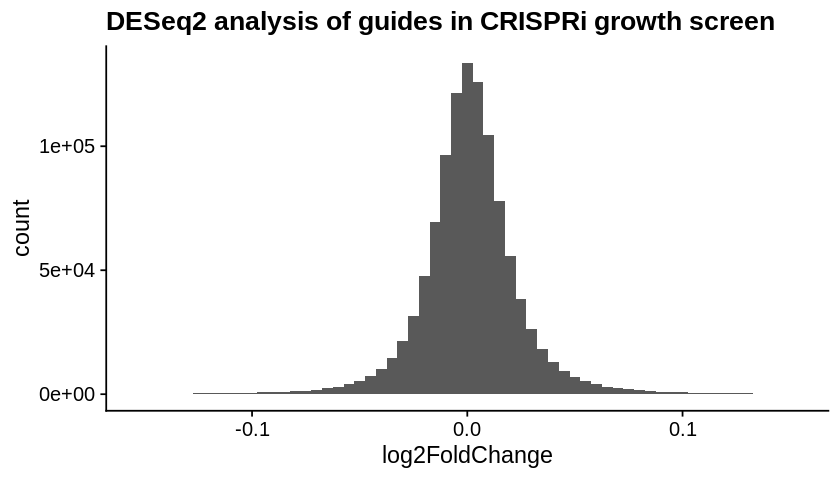

In [24]:
dat = dat_peak_crispri_growth_total
dat = dat %>% dplyr::filter(abs(log2FoldChange) <= 0.15)
print(nrow(dat))

gpt = ggplot(dat, aes(x=log2FoldChange)) + 
    geom_histogram(binwidth=0.005) + 
    labs(title = "DESeq2 analysis of guides in CRISPRi growth screen") +
    theme_cowplot()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

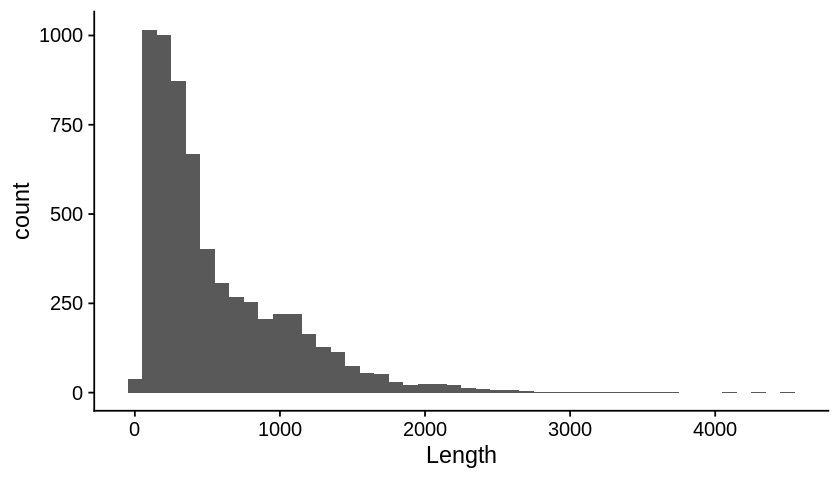

In [26]:
dat = dat_peak_crispri_growth_fdr
dat = dat %>% dplyr::mutate(Length=end-start)

gpt = ggplot(dat, aes(x=Length)) + 
    geom_histogram(binwidth=100) + 
    theme_cowplot()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

In [30]:
dat = dat_peak_crispri_growth_fdr
table(dat$log2FoldChange > 0)


FALSE  TRUE 
 4806  1436 

In [27]:
dat = dat_peak_crispri_growth_fdr
dat = dat %>% dplyr::mutate(Length=end-start)

cat("Padj", "\n")
print(summary(dat$padj))
cat("\n")
cat("Length", "\n")
print(summary(dat$Length))

Padj 
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000000 0.0003571 0.0094307 0.0157557 0.0499885 

Length 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   27.0   200.0   379.5   556.6   796.8  4467.0 


In [28]:
dat = dat_peak_crispri_growth_fdr
print(nrow(dat))
dat = dat %>% dplyr::select(chrom, start, end) %>% dplyr::distinct()
print(nrow(dat))

[1] 6242
[1] 6242
